# 의사결정나무 _분류

In [1]:
#데이터 구성, 행렬 연산
import pandas as pd
import numpy as np

#데이터 시각화
import matplotlib.pyplot as plt
import matplotlib

#export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#graphviz: 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

import os



#데이터분할: train, test
from sklearn.model_selection import train_test_split

#예측/회귀 Decision Tree
from sklearn.tree import DecisionTreeClassifier

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#confusion matrix
from sklearn.metrics import confusion_matrix

In [2]:
import os
os.environ["PATH"] += os.pathsep + '/home/piai/Desktop/Graphviz2.38/bin/'
# D:/Program Files (x86)/Graphviz2.38/bin/'

In [3]:
# 데이터 구성
df_raw = pd.read_csv("유방암.csv",engine='python')
df_raw.head() # 간단히 보여주기

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# 데이터 전처리
# 결측치 확인 및 처리
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [5]:
df_y = df_raw['diagnosis']
df_x = df_raw.drop('diagnosis', axis=1, inplace=False)



# 데이터 비율에 맞게 분할
df_train_x,df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

print("\n")

# validation -> 검증용
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y ,test_size = 3/7, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_validation_x.shape))
print('validation data X size : {}'.format(df_validation_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data X size : (171,)


In [6]:
# train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 정리
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_validation_x.shape))
print('validation data Y size : {}'.format(df_validation_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [7]:
# 모델 생성
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(df_train_x,df_train_y)


# Train, Validation, Test데이터 설명력
print('Accuracy on training set:{:.3f}'.format(tree_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(tree_uncustomized.score(df_validation_x,df_validation_y)))
print('Accuracy on test set:{:.3f}'.format(tree_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.936
Accuracy on test set:0.895


In [8]:
# 모델 옵션 확인
# 별로 중요x
tree_uncustomized

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [9]:
# 모델 파라미터 지정
# max_depth

#train, test설명력 결과 저장
train_accuracy = []; validation_accuracy=[];

#max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth,random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))

#결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["ValidationAccuracy"] = validation_accuracy

In [10]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidationAccuracy
0,1,0.943,0.912
1,2,0.982,0.942
2,3,0.982,0.942
3,4,0.996,0.936
4,5,1.000,0.936
5,6,1.000,0.936
6,7,1.000,0.936
7,8,1.000,0.936
8,9,1.000,0.936
9,10,1.000,0.936


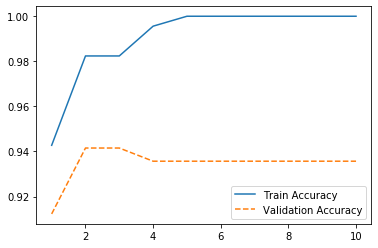

In [11]:
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

<!-- > 5/6 선택 -->

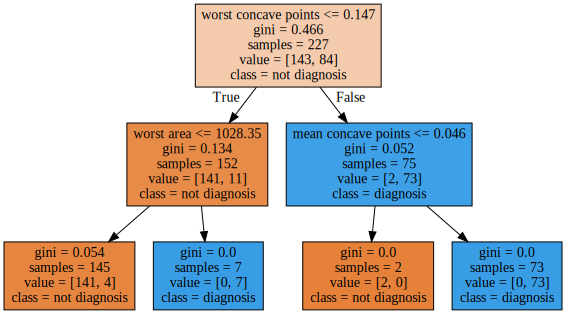

In [12]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 깊이 2 선택
tree_graph = DecisionTreeClassifier(max_depth = 2, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)


#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_graph.dot",class_names=['not diagnosis','diagnosis'], feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_graph.dot") as f:
    tree_graph = f.read()
display(graphviz.Source(tree_graph))

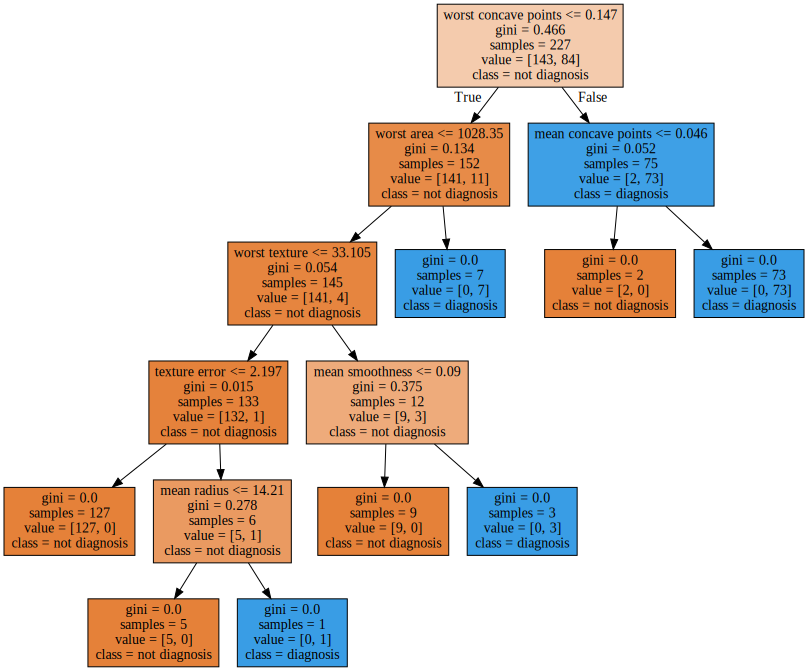

In [13]:
# 변수명 저장
v_feature_name = df_train_x.columns

# 깊이 6 선택
tree_graph = DecisionTreeClassifier(max_depth = 6, random_state=1234)
tree_graph.fit(df_train_x, df_train_y)


#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_graph.dot",class_names=['not diagnosis','diagnosis'], feature_names=v_feature_name, impurity = True, filled=True)
with open("tree_graph.dot") as f:
    tree_graph = f.read()
display(graphviz.Source(tree_graph))

In [14]:
# min_samples_split

train_accuracy = []; validation_accuracy=[];


para_split = [n_split *10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split = v_min_samples_split, max_depth =6, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))

#결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["ValidationAccuracy"] = validation_accuracy

In [15]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,10,0.996,0.936
1,20,0.982,0.942
2,30,0.982,0.942
3,40,0.982,0.942
4,50,0.982,0.942
5,60,0.982,0.942
6,70,0.982,0.942
7,80,0.974,0.936
8,90,0.974,0.936
9,100,0.974,0.936


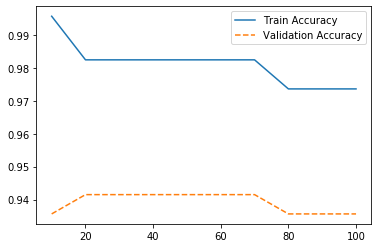

In [16]:
#모델 설명력에 대한 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

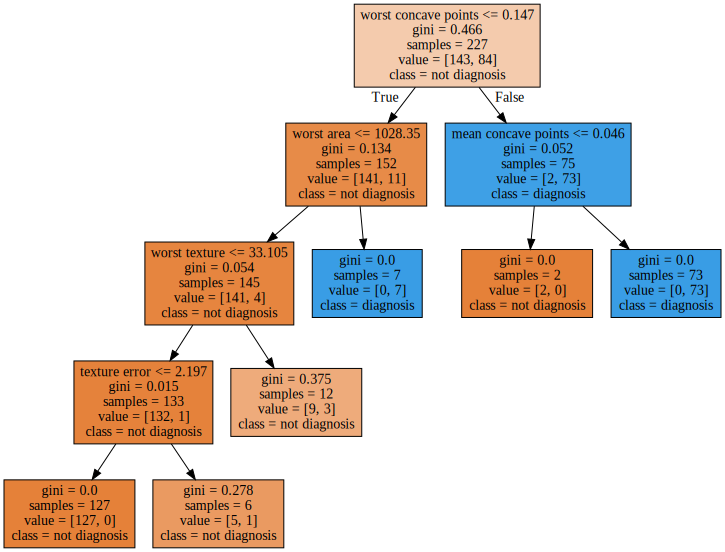

In [17]:
# 분리 노드의 최소 자료수 = 20 설정
tree_graph = DecisionTreeClassifier(max_depth = 6, min_samples_split = 60,
                                  random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_graph.dot",class_names=['not diagnosis','diagnosis'],
              feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_graph.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

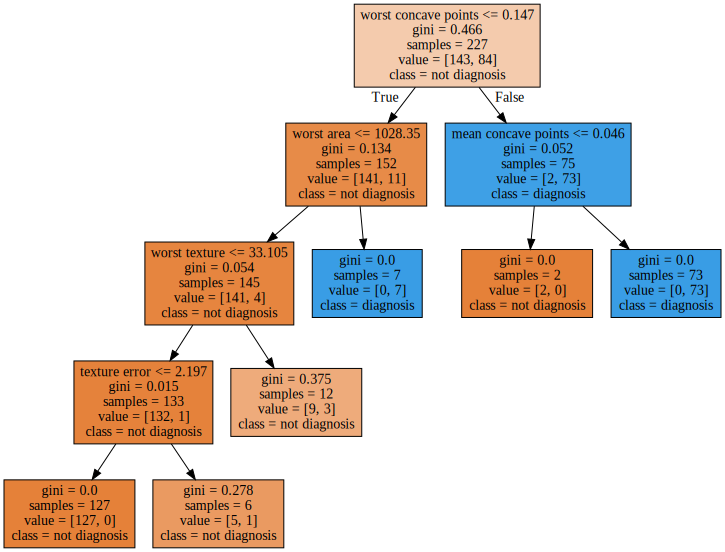

In [18]:
# 분리 노드의 최소 자료수 = 60 설정
tree_graph = DecisionTreeClassifier(max_depth = 6, min_samples_split=60,
                                  random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_graph.dot",class_names=['not diagnosis','diagnosis'],
              feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_graph.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [19]:
#min_samples_split: 잎사귀 노드 최소 자료 수 제한

train_accuracy = []; validation_accuracy=[];


para_leaf = [n_leaf *2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=60,
                                 max_depth =6, random_state=1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x, df_train_y))
    validation_accuracy.append(tree.score(df_validation_x, df_validation_y))

#결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValidationAccuracy"] = validation_accuracy

In [20]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,2,0.982,0.942
1,4,0.974,0.942
2,6,0.974,0.936
3,8,0.969,0.930
4,10,0.969,0.930
5,12,0.960,0.936
6,14,0.952,0.924
7,16,0.943,0.912
8,18,0.943,0.912
9,20,0.943,0.912


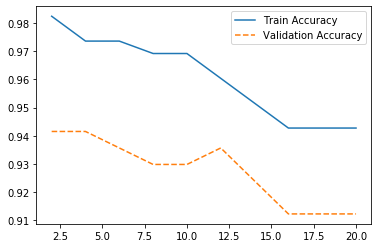

In [21]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

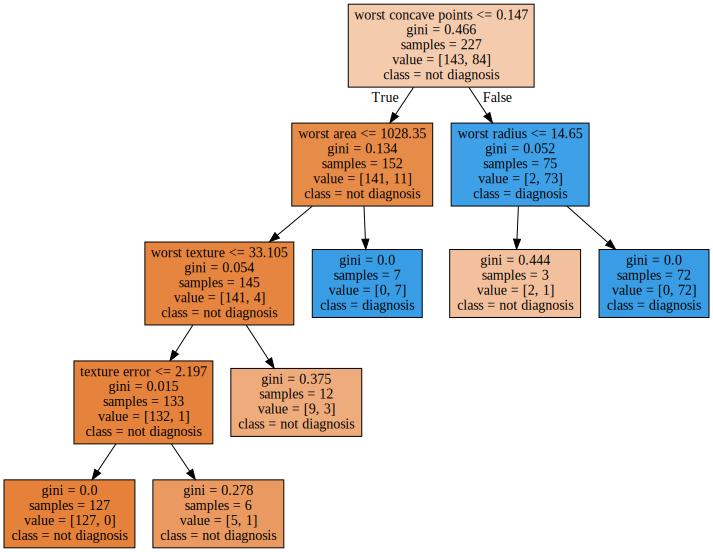

In [22]:
# 잎사귀의 최소 자료수 3으로 설정
tree_graph = DecisionTreeClassifier(max_depth=6, min_samples_split=60, min_samples_leaf=3,
                                random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_graph.dot",class_names=['not diagnosis','diagnosis'],
            feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_graph.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

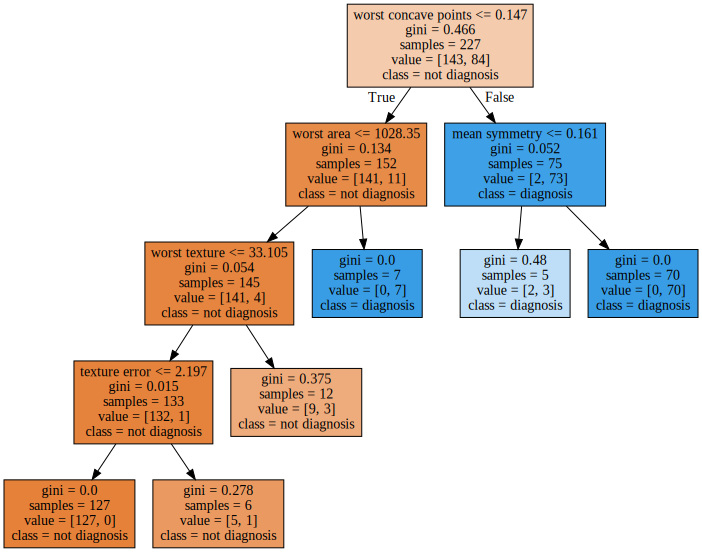

In [23]:
# 잎사귀의 최소 자료수가 5로 설정
tree_graph = DecisionTreeClassifier(max_depth=6, min_samples_split=60,min_samples_leaf=5,
                                random_state=1234)
tree_graph.fit(df_train_x, df_train_y)

#Tree 구조 생성 및 저장: 모델 시각화
export_graphviz(tree_graph, out_file="tree_graph.dot",class_names=['not diagnosis','diagnosis'],
            feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_graph.dot") as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


In [24]:
# 최종모델
tree_final = DecisionTreeClassifier(max_depth=6, min_samples_split=60, min_samples_leaf=4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=60,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

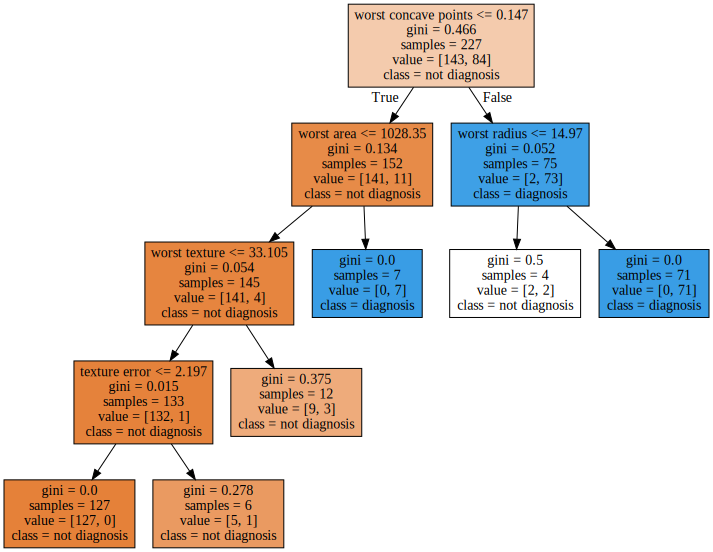

In [25]:
# dot파일로 결과 저장
export_graphviz(tree_final, out_file="tree_graph.dot", class_names=['not diagnosis','diagnosis'],
            feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_graph.dot") as f:
    tree_graph=f.read()
display(graphviz.Source(tree_graph))

In [26]:
# 평가
y_pred = tree_final.predict(df_test_x)

print('Accuracy:{0:.3f}\n'.format(tree_final.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

# Train, validation, Test 데이터 설명력
print('Accuracy on training set:{:.3f}'.format(tree_final.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(tree_final.score(df_validation_x,df_validation_y)))
print('Accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))

Accuracy:0.906

Confusion matrix:
[[103   2]
 [ 14  52]]
Accuracy on training set:0.974
Accuracy on validation set:0.942
Accuracy on test set:0.906


In [27]:
df_importance=pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace=True)
df_importance.round(3)

,Feature,Importance
27,worst concave points,0.835
23,worst area,0.129
20,worst radius,0.019
21,worst texture,0.013
11,texture error,0.003
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000


Text(0, 0.5, 'Feature')

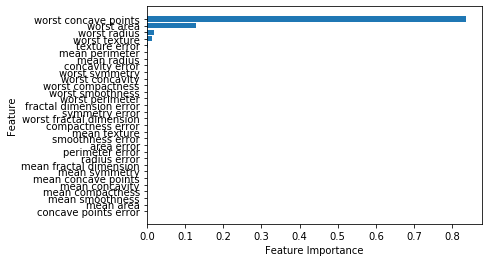

In [28]:
#설명변수 중요도
df_importance.sort_values("Importance",ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')

# 랜덤포레스트 _분류

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 회귀분석
from statsmodels.formula.api import ols
import statsmodels.api as sm

# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot,add_constant

# 선형모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf

# 선형회귀모형
from sklearn.linear_model import LinearRegression

# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE

# 평가함수
from statsmodels.tools.eval_measures import rmse

# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# jupyter notebook 사용시 그래프 자동 출력 옵션
%matplotlib inline

#export_graphviz: 나무 구조 생성 및 저장
from sklearn.tree import export_graphviz

#graphviz: 나무 구조 시각화 (.dot 확장자 파일 불러오기 등)
import graphviz

#데이터 분할:train, test
from sklearn.model_selection import train_test_split
# 2. 의사결정나무_예측

#예측 회귀 RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

#최적 모델, 파라미터 탐색
from sklearn.model_selection import GridSearchCV

#모델 성능 평가
from sklearn.metrics import confusion_matrix

In [30]:
df_raw = pd.read_csv("유방암.csv",engine='python')
df_raw.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
df_raw.isnull().sum(axis = 0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [32]:
df_y = df_raw['diagnosis']
df_x = df_raw.drop('diagnosis', axis=1, inplace=False)



# 데이터 비율에 맞게 분할
df_train_x,df_test_x, df_train_y, df_test_y = train_test_split(df_x, df_y,test_size = 0.3, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

print("\n")

# validation -> 검증용
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y ,test_size = 3/7, random_state = 1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_validation_x.shape))
print('validation data X size : {}'.format(df_validation_y.shape))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)


train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data X size : (171,)


In [33]:
# train(0.4) : validation(0.3) : test(0.3) )의 비율로 분할 정리
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_validation_x.shape))
print('validation data Y size : {}'.format(df_validation_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [34]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

print('Accuracy on training set:{:.3f}'.format(rf_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(rf_uncustomized.score(df_validation_x,df_validation_y)))
print('Accuracy on test set:{:.3f}'.format(rf_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.953
Accuracy on test set:0.924


In [35]:
#train 및 validation 설명력 결과 저장
train_accuracy=[]; validation_accuracy=[]

#n_estimators:트리 수 변경: 1~150
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    validation_accuracy.append(rf.score(df_validation_x,df_validation_y))
    
#결과저장
df_accuracy_n=pd.DataFrame()
df_accuracy_n["n_estimators"]=para_n_tree
df_accuracy_n["TrainAccuracy"]=train_accuracy
df_accuracy_n["ValidationAccuracy"]=validation_accuracy

In [36]:
#모델 정확도 그래프 확인
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,ValidationAccuracy
0,10,0.996,0.953
1,20,0.996,0.953
2,30,1.000,0.953
3,40,1.000,0.953
4,50,1.000,0.947
5,60,1.000,0.953
6,70,1.000,0.953
7,80,1.000,0.953
8,90,1.000,0.953
9,100,1.000,0.953


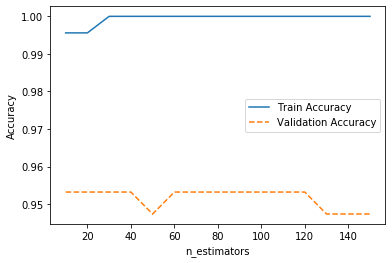

In [37]:
#모델 설명력 그래프 확인
plt.plot(para_n_tree, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_n_tree, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("Accuracy")
plt.legend()

In [38]:
# 모델 파라미터 조정

#train, test설명력 결과 저장
train_accuracy = []; validation_accuracy=[];

para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators=50,random_state=1234) #50으로 파라미터 지정
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))

#결과 저장
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["ValidationAccuracy"] = validation_accuracy

In [39]:
#모델 정확도 그래프 확인
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,ValidationAccuracy
0,1,0.934,0.924
1,2,0.982,0.930
2,3,0.987,0.947
3,4,0.996,0.953
4,5,0.996,0.953
5,6,1.000,0.947
6,7,1.000,0.947
7,8,1.000,0.947
8,9,1.000,0.947
9,10,1.000,0.947


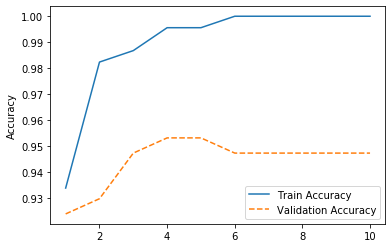

In [40]:
#모델 설명력 그래프 확인
plt.plot(para_depth, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_depth, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabe=("Max_label"); plt.ylabel("Accuracy")
plt.legend()

In [41]:
# 모델 파라미터 조정
#max_depth : 최대 깊이

#train, test설명력 결과 저장용
train_accuracy = []; validation_accuracy=[];

#min_samples_split: 분할하기 위한 노드의 최소 샘플 수
para_split = [n_split *10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split = v_min_samples_split,
                                max_depth = 4, n_estimators=50,random_state=1234) #4선택
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))

#결과 저장
df_accuracy_split = pd.DataFrame()
df_accuracy_split["MinSamplesSplit"] = para_split
df_accuracy_split["TrainAccuracy"] = train_accuracy
df_accuracy_split["ValidationAccuracy"] = validation_accuracy

In [42]:
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,ValidationAccuracy
0,10,0.991,0.942
1,20,0.987,0.947
2,30,0.982,0.942
3,40,0.982,0.942
4,50,0.982,0.942
5,60,0.978,0.942
6,70,0.982,0.947
7,80,0.982,0.942
8,90,0.978,0.942
9,100,0.965,0.942


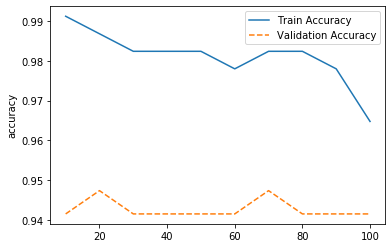

In [43]:
#모델 설명력에 대한 그래프 확인
plt.plot(para_split, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_split, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.xlabe=("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [44]:
# 모델 파라미터 지정
#min_samples_split: 잎사귀 노드 최소 자료 수

#train, test설명력 결과 저장용
train_accuracy = []; validation_accuracy=[];

para_leaf = [n_leaf *2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=80,
                                 max_depth =4,n_estimators=50, random_state=1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x, df_train_y))
    validation_accuracy.append(rf.score(df_validation_x, df_validation_y))

#결과 저장
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf["TrainAccuracy"] = train_accuracy
df_accuracy_leaf["ValidationAccuracy"] = validation_accuracy

In [45]:
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,ValidationAccuracy
0,2,0.982,0.947
1,4,0.978,0.947
2,6,0.974,0.947
3,8,0.982,0.947
4,10,0.978,0.947
5,12,0.974,0.947
6,14,0.982,0.953
7,16,0.982,0.953
8,18,0.978,0.953
9,20,0.982,0.959


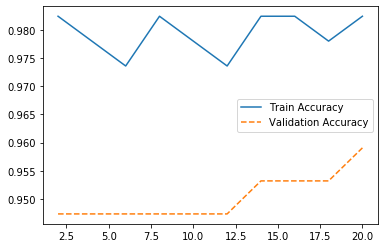

In [46]:
#모델 설명력에 대한 그래프 확인
plt.plot(para_leaf, train_accuracy, linestyle="-", label="Train Accuracy")
plt.plot(para_leaf, validation_accuracy, linestyle="--", label="Validation Accuracy")
plt.legend()

In [47]:
# 최종모델
rf_final = RandomForestClassifier(max_depth=4, min_samples_split=60, min_samples_leaf=12,
                                  n_estimators=50,random_state=1234)
rf_final.fit(df_train_x, df_train_y)

#평가
y_pred = rf_final.predict(df_test_x)

# Train 데이터 설명력
print('Accuracy on training set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
# Validation 데이터 설명력
print('Accuracy on validation set:{:.3f}'.format(rf_final.score(df_validation_x,df_validation_y)))
# Test 데이터 설명력
print('Accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))

Accuracy on training set:0.978
Accuracy on validation set:0.953
Accuracy on test set:0.942


In [48]:
#변수명
v_feature_name = df_train_x.columns

#tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance=pd.DataFrame()
df_importance['Feature']=v_feature_name
df_importance['importance']=rf_final.feature_importances_

#df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("importance",ascending=False,inplace=True)
df_importance.round(3)

,Feature,importance
20,worst radius,0.156
22,worst perimeter,0.136
6,mean concavity,0.125
27,worst concave points,0.111
23,worst area,0.100
7,mean concave points,0.081
0,mean radius,0.066
2,mean perimeter,0.052
3,mean area,0.035
13,area error,0.031


Text(0, 0.5, '변수')

/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48320 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/piai/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: Runtim

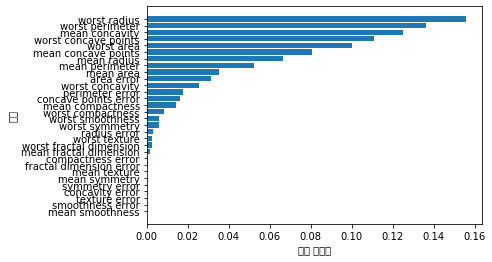

In [49]:
#설명변수 중요도 그래프
df_importance.sort_values("importance",ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance["importance"])
plt.yticks(coordinates,df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

# worst radius, worst perimeter는 큰 영향을 미치는 설명변수